# Assignment 7 - Graph drawing and network analysis

In this assignment you will get to work with graphs using the [graph-tool python module](https://graph-tool.skewed.de/).

Learning goals are:

* perform basic network analysis to create derived graph properties,
* visualize graphs and their properties.

If you require an introduction to basic graph notions, consider to read the so-titled section in [Maël Fabien
's blog post](https://towardsdatascience.com/introduction-to-graphs-part-1-2de6cda8c5a5) on this subject. While graph theory and algorithms can lead to fairly deep mathematical discussion, the basic definitions and much practical use of graph data is quite easy to get started with.

For further background on `graph-tool` refer to the [graph tutorial slides](https://stevenbergner.github.io/Teaching/cmpt767/graph-tutorial) and maybe the [tutorial notebook](https://stevenbergner.github.io/Teaching/cmpt767/graph-tool-tutorial-todo.ipynb) ([filled version](graph-tool-tutorial.ipynb)). See the [lab setup](#Environment-setup-details) on how you can use graph tool on the lab machines.

In [1]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo

Executing: /tmp/apt-key-gpghome.D24clqE2Ym/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: 8 signatures not checked due to missing keys
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://devel

In [2]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
%matplotlib inline
import graph_tool.all as gt
print("graph-tool version: {}".format(gt.__version__.split(' ')[0]))
import gt_utils as au

graph-tool version: 2.44


/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1501: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from 'gi' (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


# Problem 1: Power grid analysis

In [20]:
g = gt.collection.data['power']
display(Markdown(gt.collection.descriptions['power']))

Power grid: An undirected, unweighted network representing the topology of the Western States Power Grid of the United States. Data compiled by D. Watts and S. Strogatz and made available on the web `here <http://cdg.columbia.edu/cdg/datasets>`_. Please cite D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_.

 In this graph an edge represents a power supply line. A node is either a generator, a transformator, or a substation.
 
**Task 1a**: Create a drawing of this graph that emphasizes nodes that have more than 10 incident power supply lines. Set the size of all other nodes to 0, but retain visibility of the power lines.

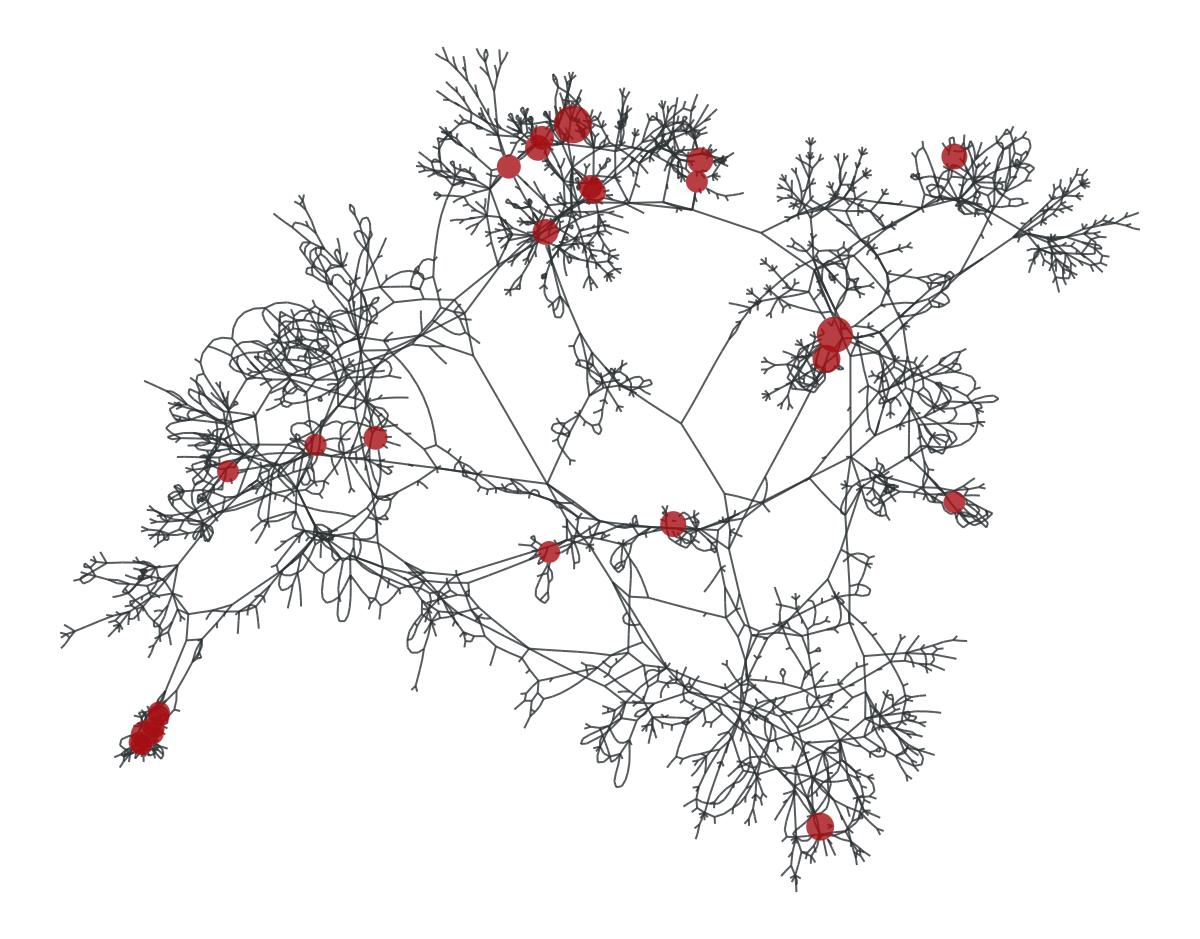

In [21]:
lines=g.new_vp('int',vals=None,val=None)
for i in g.vertices():
  lines[i]=0
  if (i.out_degree()>10):
    lines[i]=i.out_degree()
gt.graph_draw(g,pos=g.vp["pos"],vertex_size=lines,adjust_aspect=True,inline_scale=2,edge_pen_width=1,ink_scale=1);

**Task 1b:** Identify one of the centrality measures that can be used to indicate powerlines that act as a bridge between different parts of the network. Use this to emphasize structurally important nodes and powerlines.

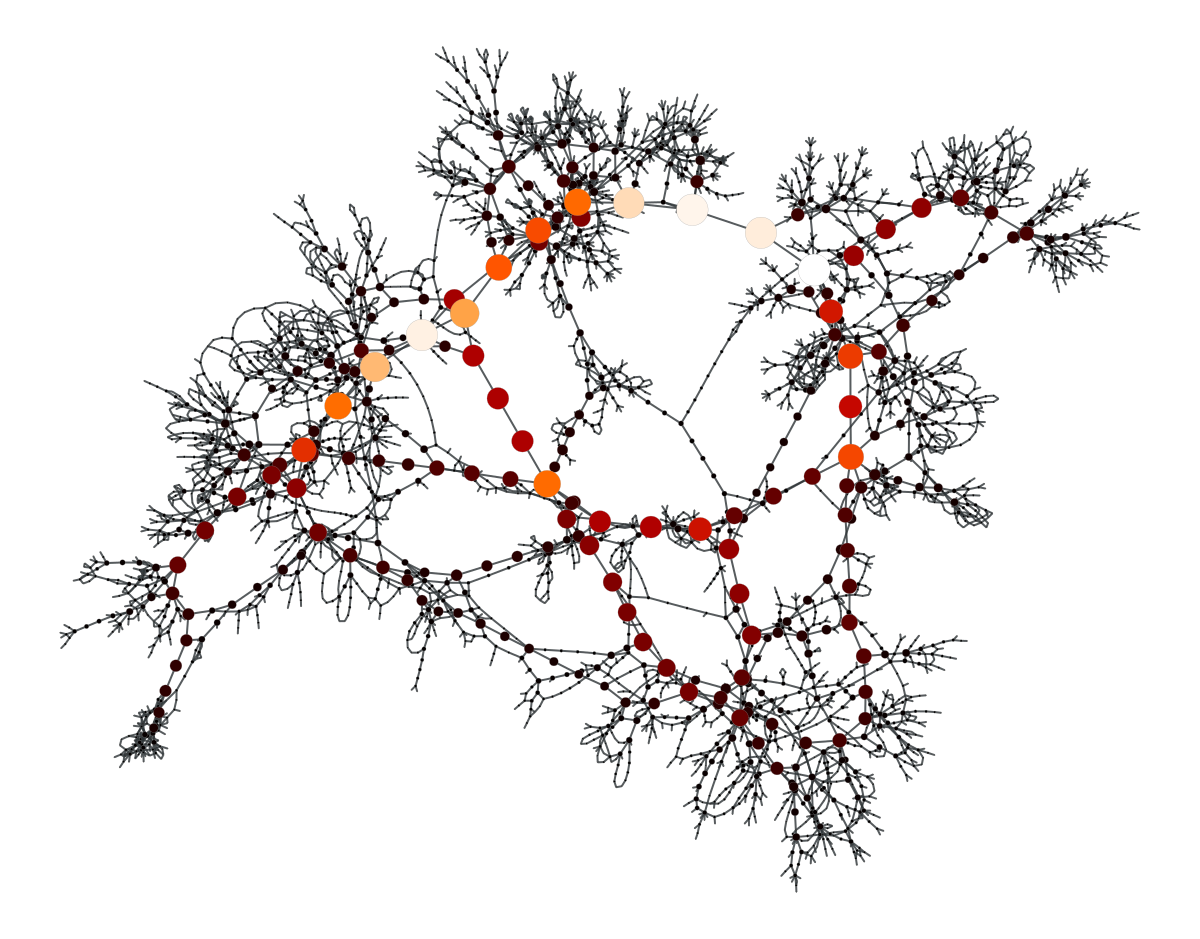

In [22]:
vp, ep = gt.betweenness(g)
gt.graph_draw(g,pos=g.vp["pos"],adjust_aspect=True,inline_scale=2,vertex_size=gt.prop_to_size(vp,mi=0.5,ma=16),vcmap=mpl.cm.gist_heat,edge_pen_width=1,ink_scale=1,vertex_fill_color=vp,vorder=vp);

# Problem 2: Small social graph visualization

In [24]:
X_knows = {
    'Mary': ['Peter', 'Albert', 'DavidF', 'Peter'],
    'Judy': ['Bob', 'Alan'],
    'Peter': ['Mary', 'DavidF', 'Jon'],
    'DavidF': ['Albert', 'Joseph', 'Peter', 'Mary'],
    'Jon': ['Peter', 'Joseph', 'DavidE'],
    'DavidE': ['Jon', 'Joseph', 'Albert'],
    'Joseph': ['DavidE', 'Jon', 'DavidF'],
    'Bob': ['Judy', 'Alan'],
    'Alan': ['Bob', 'Mary', 'Judy'],
    'Albert': ['DavidF', 'Mary', 'DavidE'],
}

**Task**: Create an undirected graph that represents the personal network above, remove parallel edges, and draw using a layout that resembles the tidy example given in the [lecture](../index.html) and as shown further below.

# TODO adjust the code below and add to it



In [204]:
g = gt.Graph(directed=False)

In [205]:
v_name = g.add_edge_list(((n,k) for n in X_knows for k in X_knows[n]),
                         hashed=True)
g.vp['name'] = v_name
pos = gt.arf_layout(g)
au.rotate_layout(pos, "Alan", "Mary", v_name)
gt.remove_parallel_edges(g)

In [206]:
from numpy.ma.core import size
vprops = dict(
   size=10
)

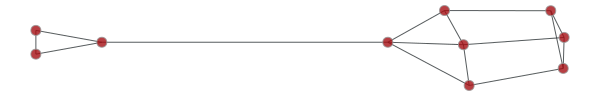

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc358667850, at 0x7fc357dffcd0>

In [253]:
gt.graph_draw(
    g,
    pos=pos,
    vprops=vprops,
    output_size=(600,600), # adjust to fit screen
    fit_view=.9,
    fmt="svg"
)

After adjusting the code above you should be able to obtain a result like this.
![](graph.svg)

# Problem 3: Facebook graph analysis

For this question we will work with a real social graph of facebook friendship connections. Please download [`facebook_combined.txt` from SNAP](https://snap.stanford.edu/data/ego-Facebook.html), the Stanford Large Network Dataset Collection and create a `Graph` object with `graph-tool`. The dataset contains the ego networks of 10 facebook users, i.e. it contains the ego nodes, the friends of each of these facebook users, and the connections among those friends.

Goal below is to determine influencers among the users, based on a measure of centrality and not including the ego nodes themselves.

**Task 3a:** Load the dataset and create a drawing of the graph.

In [254]:
input=gt.load_graph_from_csv('facebook_combined.txt',hashed=True,ecols=(0, 1),csv_options={'delimiter': ' '})

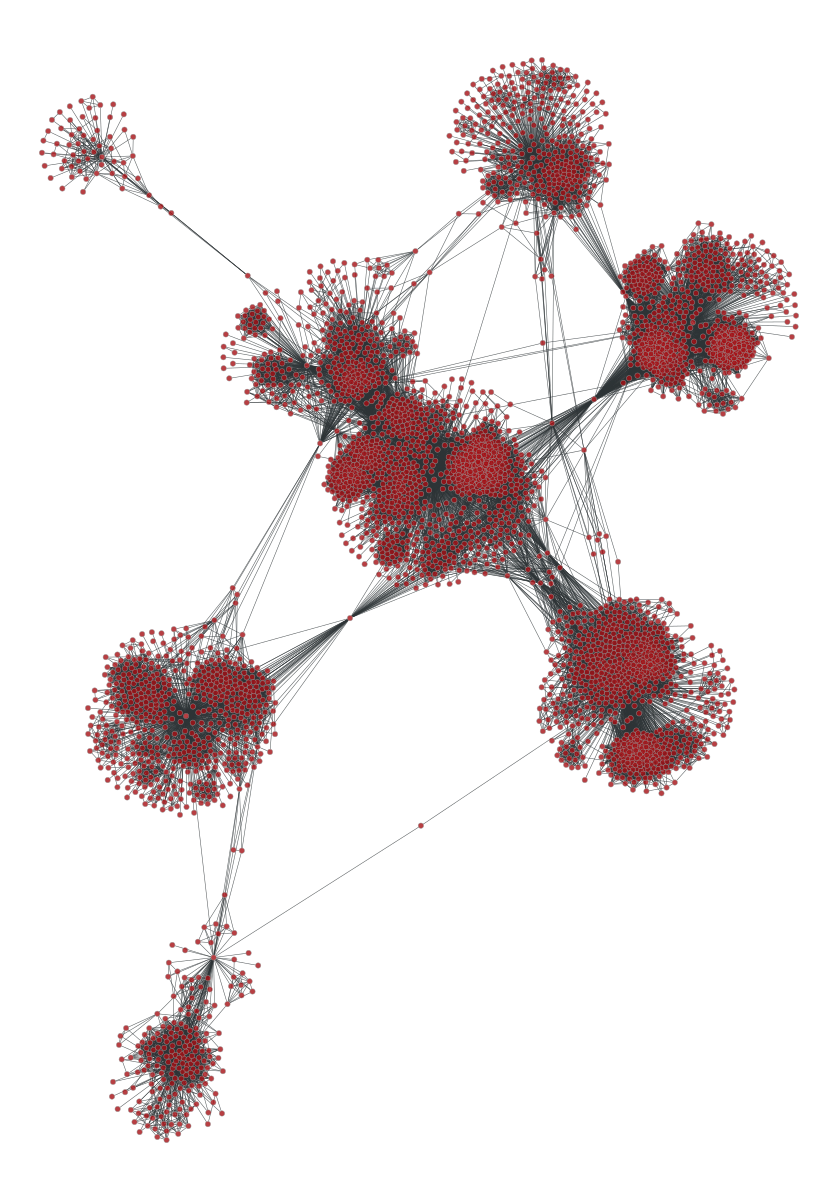

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc35857d9d0, at 0x7fc358451210>

In [209]:
gt.graph_draw(input)

**Task 3b:** Calculate and show a histogram of pairwise distances among users. Internally, this distance would be computed for the shortest path of connections among any pair of users.

Use a log-scale of the frequencies to scale the histogram bars.

What is the diameter of this graph?

*Hint:* Calculating and drawing the histograms amounts to two lines of code using `gt` and `plt` modules.

(8.0,
 (<Vertex object with index '1946' at 0x7fc37a046330>,
  <Vertex object with index '4035' at 0x7fc37a046c90>))

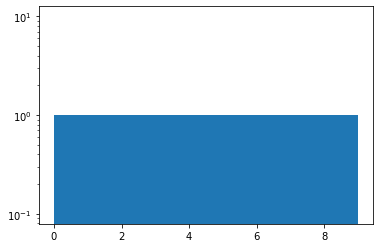

In [269]:
output1,output2=gt.distance_histogram(input)
plt.hist(output2,log=True)
gt.pseudo_diameter(input)

**Task 3c:** Determine influencers, i.e. people withing the ego network that are well connected among friends.

There are several steps to this analysis. First, remove the ego nodes. You can do this in an approximate way, simply by calculating a measure of influence of a user and removing the highest scoring nodes, assuming that these naturally are the ego nodes whose friends this network consists of.

Use `PageRank` as a measure of influence of a node.

*Step 1* - Create a drawing of a GraphView that only retains nodes with a `pagerank` $< 0.002$.

In [265]:
input.vp['pageranking']=gt.pagerank(input)

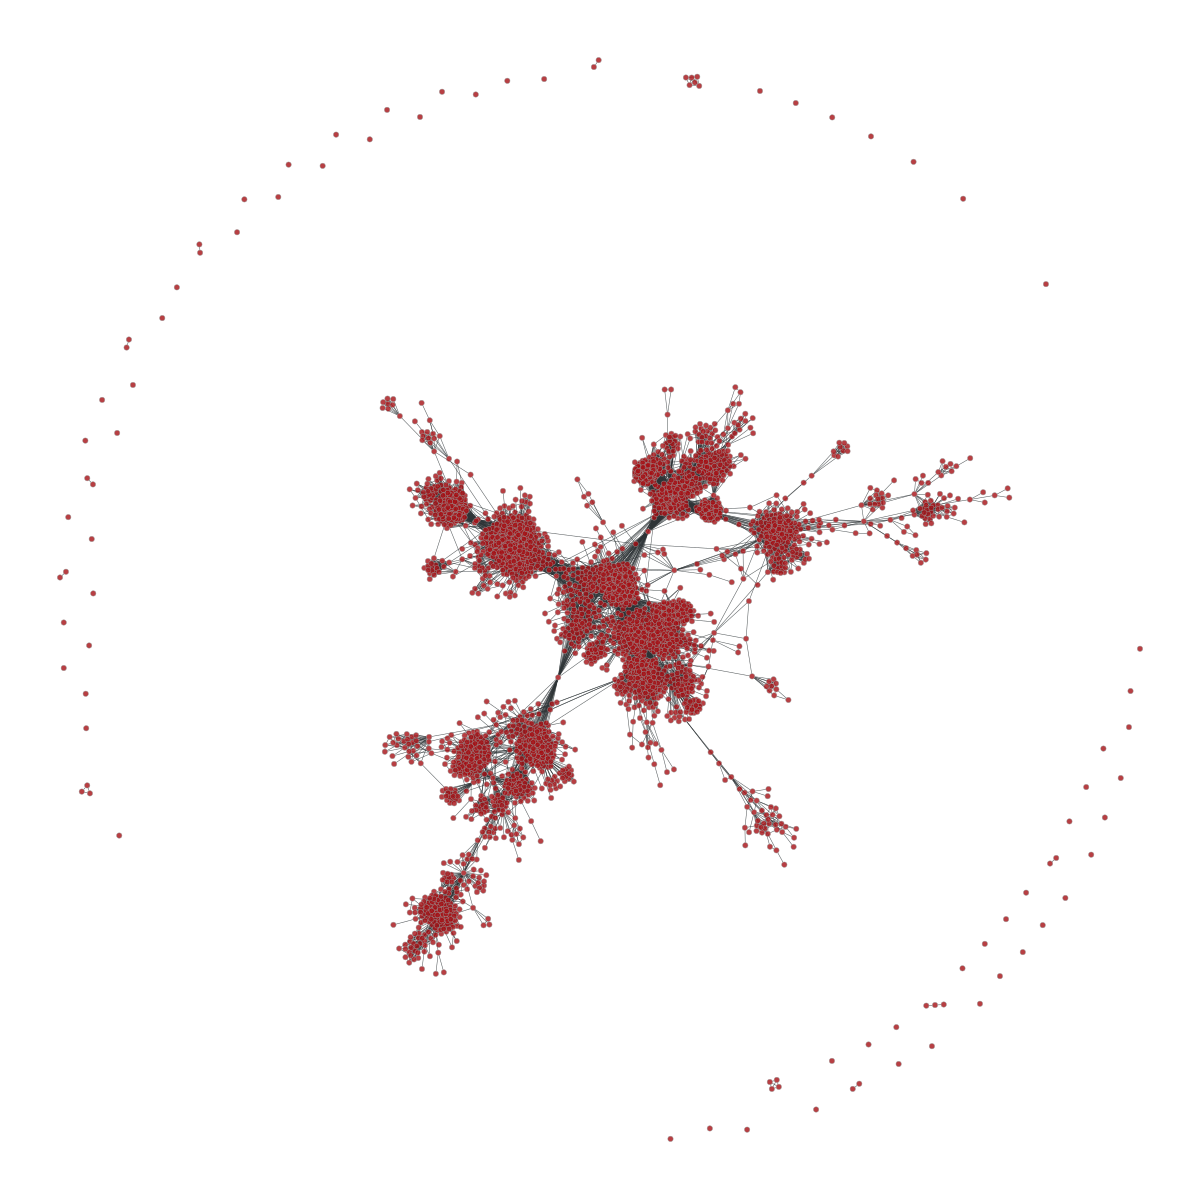

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc357dff550, at 0x7fc357dffed0>

In [266]:
input1=gt.GraphView(input,vfilt=input.vp['pageranking'].a<0.002)
gt.graph_draw(input1)

*Step 2* - Only retain the largest connected component of this graph, i.e. create another [`GraphView`](https://graph-tool.skewed.de/static/doc/quickstart.html#graph-views) of only this largest component.

In [261]:
# TODO
inputc2=gt.GraphView(input1,vfilt=gt.label_largest_component(input1))

*Step 3* - Recalculate pagerank for each node, choose a threshold (e.g. 0.0005) above which only a small part of the users are selected. Create a drawing that emphasizes these users that play central roles among their friends.

In [267]:
# TODO
inputc2.vp['pageranking']=gt.pagerank(inputc2)

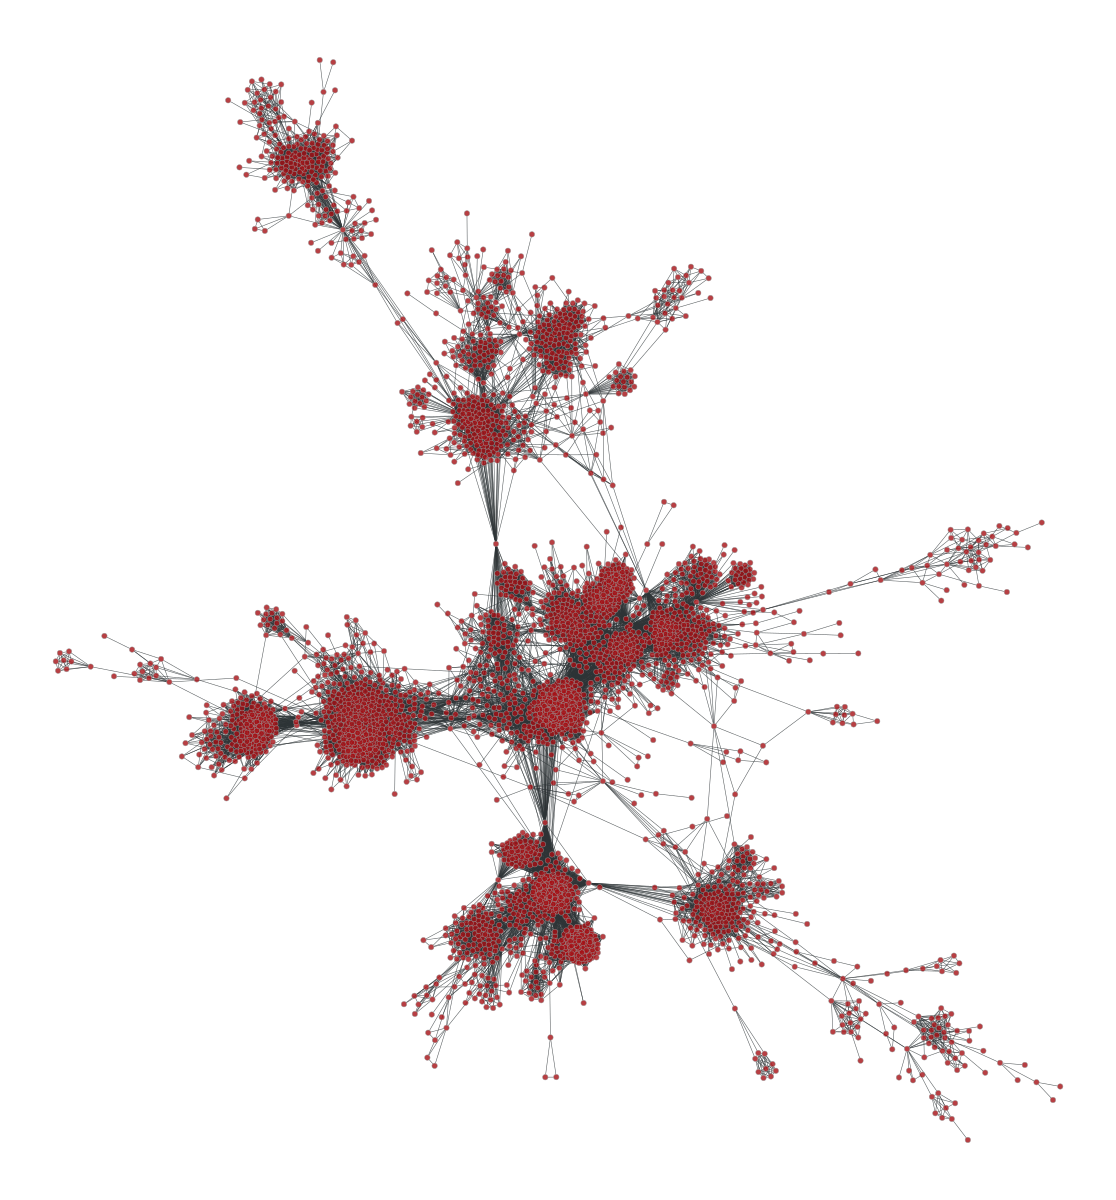

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc357e1aa10, at 0x7fc35856bfd0>

In [268]:
inputc23=gt.GraphView(inputc2,vfilt=inputc2.vp['pageranking'].a<0.0005)
gt.graph_draw(inputc2,vcmap=mpl.cm.gist_heat)

# Environment setup details

[Setup instruction](https://git.skewed.de/count0/graph-tool/-/wikis/installation-instructions#installation-via-package-managers) are available for most environments. To use the setup in the lab, see below.

We have prepared a `conda` environment in the lab that contains all modules required for this assignment. You can activate the environment as follows:

```
conda activate /usr/shared/CMPT/big-data/condaenv/pybd
```

#### You might get an error
`CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.`
This happens, if you have not used conda before. To perform initialization once, we recommend the following steps:
```
conda init bash
conda config --set auto_activate_base false
```
If you now restart your terminal shell or simply invoke a new one by typing `bash`, you can try activating the environment, again.

# Submission instructions
Please submit [this notebook](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A7/A7.ipynb) 
to [CourSys](https://coursys.sfu.ca/2022sp-cmpt-733-g1/+a7/),
filled out with figures included.